In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Import Dataset

In [2]:
parse_dates = ['release_date']
df = pd.read_csv("Data/eda.csv", parse_dates=parse_dates)
df.head()

/var/folders/dq/43_5rtyn5lz1p4vkq89ykdw40000gn/T/ipykernel_7178/284090481.py:2: DtypeWarning: Columns (19,20,21,22,24,26,28,29,30,75) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Data/eda.csv", parse_dates=parse_dates)


,Unnamed: 0.1,Unnamed: 0,adult,budget,original_language,popularity,release_date,status,vote_average,vote_count,...,genre_Western,revenue,runtime,release_year,movie_title,budget_class,profit,profit_percent,movie_class,release_month
0,0,0,False,30000000.0,en,21.946943,1995-10-30,Released,7.7,5415.0,...,0,373554033.0,81.0,1995.0,Toy Story,mid,343554033.0,1.145180e+03,all_time_blockbuster,10.0
1,1,1,False,65000000.0,en,17.015539,1995-12-15,Released,6.9,2413.0,...,0,262797249.0,104.0,1995.0,Jumanji,high,197797249.0,3.043035e+02,all_time_blockbuster,12.0
2,2,2,False,0.0,en,11.712900,1995-12-22,Released,6.5,92.0,...,0,0.0,101.0,1995.0,Grumpier Old Men,low,0.0,0.000000e+00,below_avg,12.0
3,3,3,False,16000000.0,en,3.859495,1995-12-22,Released,6.1,34.0,...,0,81452156.0,127.0,1995.0,Waiting to Exhale,mid,65452156.0,4.090760e+02,all_time_blockbuster,12.0
4,4,4,False,0.0,en,8.387519,1995-02-10,Released,5.7,173.0,...,0,76578911.0,106.0,1995.0,Father of the Bride Part II,low,76578911.0,7.657891e+14,all_time_blockbuster,2.0


## Compute Star's Power

In [3]:
df[['star']]

,star
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
979116,NaN
979117,NaN
979118,NaN
979119,NaN


In [4]:
df['star'].notna().sum()

788335

In [5]:
df['star'] = df['star'].str.split(', \n')

In [6]:
not_null_star = df['star'].notna()
star_lists = df[not_null_star]['star'].values

In [7]:
star_powers = dict()

for star_list in star_lists:
    for star in star_list:
        star_powers[star] = 0

In [8]:
stars_with_revenue = df[['star', 'revenue']].values
for stars, revenue in stars_with_revenue:
    if math.isnan(revenue):
        continue
    if type(stars) == list:
        for star in stars:
            star_powers[star] += revenue

In [9]:
def myfunc(item):
    stars = item['star']
    star_power = 0
    if type(stars) == list :
        for star in stars:
            star_power += star_powers[star]
    
    return star_power

df['star_power'] = df[['star']].apply(myfunc, axis=1)

In [10]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,adult,budget,original_language,popularity,release_date,status,vote_average,vote_count,...,revenue,runtime,release_year,movie_title,budget_class,profit,profit_percent,movie_class,release_month,star_power
979116,1306151,1306151,False,0.0,en,5.683753,1991-05-13,Released,5.7,26.0,...,0.0,104.0,1991.0,Robin Hood,low,0.0,0.0,below_avg,5.0,0.0
979117,1306153,1306153,False,0.0,tl,0.178241,2011-11-17,Released,9.0,3.0,...,0.0,360.0,2011.0,Century of Birthing,low,0.0,0.0,below_avg,11.0,0.0
979118,1306154,1306154,False,0.0,en,0.903007,2003-08-01,Released,3.8,6.0,...,0.0,90.0,2003.0,Betrayal,low,0.0,0.0,below_avg,8.0,0.0
979119,1306155,1306155,False,0.0,en,0.003503,1917-10-21,Released,0.0,0.0,...,0.0,87.0,1917.0,Satan Triumphant,low,0.0,0.0,below_avg,10.0,0.0
979120,1306156,1306156,False,0.0,en,0.163015,2017-06-09,Released,0.0,0.0,...,0.0,75.0,2017.0,Queerama,low,0.0,0.0,below_avg,6.0,0.0


## Compute Director Power

In [11]:
# A lot of director, so we should make use of it.
df['director'].notna().sum()

864159

In [12]:
df['director'].unique()

array([nan, 'Maurice Tourneur', 'Frank Lloyd', ..., 'Norman Lee',
       'Danny Denzongpa', 'Henry Levin, \nGeorge Sherman'], dtype=object)

In [13]:
df['director'] = df['director'].str.split(', \n')

In [14]:
not_null_director = df['director'].notna()
director_lists = df[not_null_director]['director'].values

director_powers = dict()

for director_list in director_lists:
    for director in director_list:
        director_powers[director] = 0

In [15]:
dirs_with_revenue = df[['director', 'revenue']].values
for directors, revenue in dirs_with_revenue:
    if math.isnan(revenue):
        continue
    if type(directors) == list:
        for director in directors:
            director_powers[director] += revenue

In [16]:
def create_director_power(item):
    directors = item['director']
    dir_power = 0
    if type(directors) == list :
        for director in directors:
            dir_power += director_powers[director]
    
    return dir_power

df['director_power'] = df[['director']].apply(create_director_power, axis=1)

In [17]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,adult,budget,original_language,popularity,release_date,status,vote_average,vote_count,...,runtime,release_year,movie_title,budget_class,profit,profit_percent,movie_class,release_month,star_power,director_power
979116,1306151,1306151,False,0.0,en,5.683753,1991-05-13,Released,5.7,26.0,...,104.0,1991.0,Robin Hood,low,0.0,0.0,below_avg,5.0,0.0,0.0
979117,1306153,1306153,False,0.0,tl,0.178241,2011-11-17,Released,9.0,3.0,...,360.0,2011.0,Century of Birthing,low,0.0,0.0,below_avg,11.0,0.0,0.0
979118,1306154,1306154,False,0.0,en,0.903007,2003-08-01,Released,3.8,6.0,...,90.0,2003.0,Betrayal,low,0.0,0.0,below_avg,8.0,0.0,0.0
979119,1306155,1306155,False,0.0,en,0.003503,1917-10-21,Released,0.0,0.0,...,87.0,1917.0,Satan Triumphant,low,0.0,0.0,below_avg,10.0,0.0,0.0
979120,1306156,1306156,False,0.0,en,0.163015,2017-06-09,Released,0.0,0.0,...,75.0,2017.0,Queerama,low,0.0,0.0,below_avg,6.0,0.0,0.0


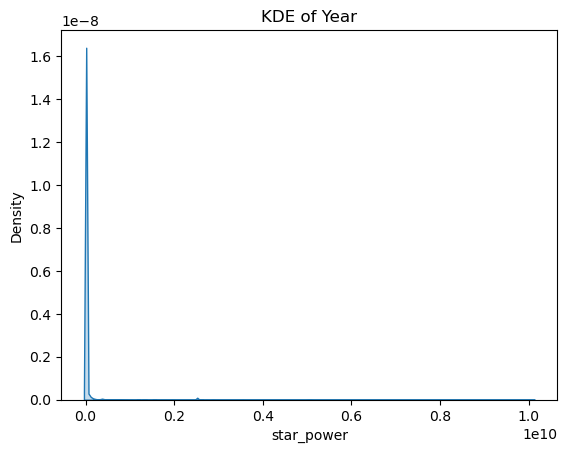

In [19]:
sns.kdeplot(df['star_power'], fill=True)
plt.title("KDE of Year")
plt.show()

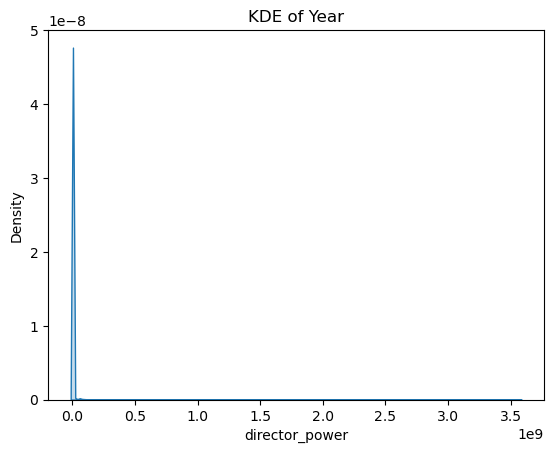

In [21]:
sns.kdeplot(df['director_power'], fill=True)
plt.title("KDE of Year")
plt.show()

/Users/myothiha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='star_power', ylabel='profit'>

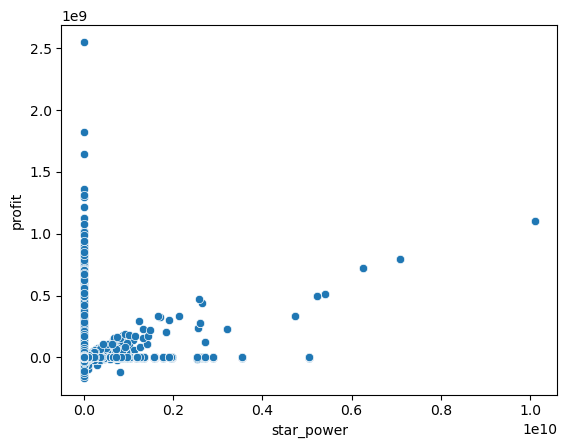

In [22]:
sns.scatterplot(df['star_power'], df['profit'])

/Users/myothiha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='director_power', ylabel='profit'>

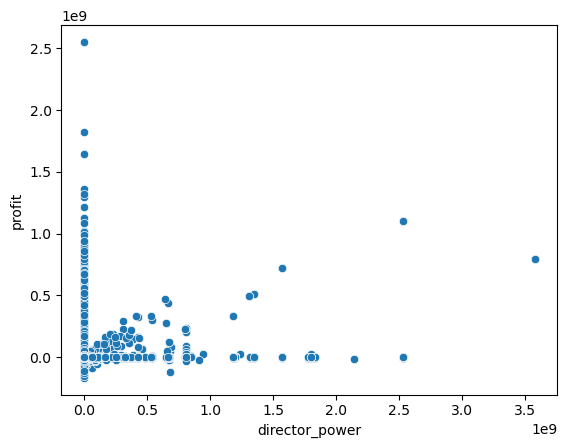

In [23]:
sns.scatterplot(df['director_power'], df['profit'])

In [43]:
null_star_power = df['star_power'] == 0
not_null_star = df['star'].notna()
null_start_power_but_not_null = np.logical_and(null_star_power, not_null_star)
df[null_start_power_but_not_null][['star', 'revenue']]

,star,revenue
118,"[Willard Parker, Merry Anders, Robert Dix, Joh...",0.0
119,"[Willard Parker, Merry Anders, Robert Dix, Joh...",0.0
129,"[Kent Taylor, Linda Hayes, Howard Da Silva, Ra...",0.0
130,"[Kent Taylor, Linda Hayes, Howard Da Silva, Ra...",0.0
648,"[George Montgomery, Terry Moore, Gay Perkins, ...",0.0
...,...,...
979056,"[Cornel Wilde, Anita Louise, Jill Esmond, Edga...",0.0
979057,"[Cornel Wilde, Anita Louise, Jill Esmond, Edga...",0.0
979099,"[Errol Flynn, Maureen O'Hara, Anthony Quinn, A...",0.0
979100,"[Errol Flynn, Maureen O'Hara, Anthony Quinn, A...",0.0


In [42]:
star_powers["Maureen O'Hara"]

0.0

In [21]:
import pickle

powers = {
    'star_powers': star_powers,
    'director_powers': director_powers
}

file = open('powers.dict', 'wb')
pickle.dump(powers, file)
file.close()

In [18]:
df.to_csv('Data/movie_data_w_star_power.csv')